# 課題１

MNISTの高解像度版データセット用読み込みjupyter file

- [このリンク](http://yann.lecun.com/exdb/mnist/)から4つのファイルをダウンロードし、解凍して、このファイルと同じディレクトリに置く
- このプログラムと同じディレクトリにdatasetsのフォルダを作る
- 解凍した４つのファイルを入れる
- path: datasets
- kind: "train" or "t10k"
読み込みが完了し、trainとtestのimagesとlabelsに分けて読み込むとする。

In [2]:
import sys
import struct
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte'% kind)
    #images_path = "datasets/t10k-images.idx3-ubyte"
    #labels_path = "datasets/t10k-labels.idx1-ubyte"
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)
        
    return images, labels, rows, cols

In [4]:
train_images, train_labels, train_rows, train_cols= load_mnist("datasets",kind="train")
test_images, test_labels, test_rows, train_cols = load_mnist("datasets",kind="t10k")

In [5]:
train_images.shape

(60000, 784)

In [6]:
x_train = train_images

In [7]:
y_train = train_labels
x_test = test_images
y_test = test_labels

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
k = KNeighborsClassifier()

In [10]:
k.fit(x_train, y_train)

KNeighborsClassifier()

# 課題２
MNISTのデータセットについて以下の点を調べなさい。  

・縦横のピクセル数  
・色味（RGB？グレースケール？２値画像？）  
・matplotlibでその像を表示しなさい

Q1

In [11]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
train_cols

28

In [13]:
train_rows

28

Q2  
値の最小と最大を求めれば、諧調がわかる  
ビット数はdtype=uint8  
http://www.igunoss.co.jp/imageproc/imageproc1-2.html#:~:text=%E3%82%B0%E3%83%AC%E3%83%BC%E3%82%B9%E3%82%B1%E3%83%BC%E3%83%AB%E7%94%BB%E5%83%8F%E3%81%AF%E3%80%811,%E3%81%8C%E7%99%BD%E3%81%AB%E3%81%AA%E3%82%8A%E3%81%BE%E3%81%99%E3%80%82&text=%E3%82%AB%E3%83%A9%E3%83%BC%E7%94%BB%E5%83%8F%E3%81%A8%E3%82%B0%E3%83%AC%E3%83%BC%E3%82%B9%E3%82%B1%E3%83%BC%E3%83%AB%E7%94%BB%E5%83%8F%E3%81%AE%E8%A6%8B%E5%88%86%E3%81%91%E6%96%B9%EF%BC%9F

In [14]:
x_train[0].min()

0

In [15]:
x_train[0].max()

255

Q3

In [16]:
# 形式を変更する
# 現状
x_train.shape

(60000, 784)

In [17]:
m = x_train.reshape(60000, train_rows, train_cols)

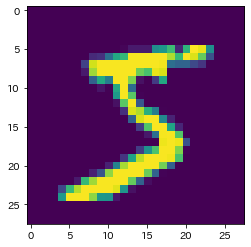

In [18]:
plt.imshow(m[0])

# 課題３  
自分で書いた手書き文字（数字）が上記学習器を使って認識できるか

In [22]:
!pip install scikit-image


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from skimage import io, color

In [21]:
# ファイル名
fileName = "mnist1.jpg"

In [22]:
# パスの読み込み
img = io.imread(fileName)

In [23]:
# 画像を色の値にする
img_color = color.rgb2gray(img)
img_color.shape

(28, 28)

In [24]:
# X has 28 features, but KNeighborsClassifier is expecting 784 features as input.でエラーが起こる
# →28行が28個あるという意味になっているからエラーになった
pred = k.predict(img_color)

ValueError: X has 28 features, but KNeighborsClassifier is expecting 784 features as input.

In [28]:
# そのため1行にする
img_color = img_color.reshape(1, -1)
img_color 

array([[0.60589373, 0.60589373, 0.6092498 , 0.61119922, 0.61119922,
        0.61538863, 0.61538863, 0.6193102 , 0.61677255, 0.62853725,
        0.63245882, 0.62461569, 0.62069412, 0.64030196, 0.61817137,
        0.63385765, 0.62684784, 0.62684784, 0.62684784, 0.62292627,
        0.62292627, 0.61900471, 0.61786588, 0.61786588, 0.61394431,
        0.61002275, 0.60610118, 0.60217961, 0.60589373, 0.6092498 ,
        0.6092498 , 0.61119922, 0.61119922, 0.61538863, 0.6193102 ,
        0.6193102 , 0.62853725, 0.62461569, 0.62461569, 0.63245882,
        0.64422353, 0.62069412, 0.62209294, 0.62993608, 0.63076941,
        0.62684784, 0.62684784, 0.62684784, 0.62292627, 0.62178745,
        0.61786588, 0.61786588, 0.61786588, 0.61394431, 0.61002275,
        0.60610118, 0.60532824, 0.6092498 , 0.6092498 , 0.61119922,
        0.61736078, 0.61538863, 0.6193102 , 0.62069412, 0.61677255,
        0.64030196, 0.62461569, 0.6481451 , 0.62461569, 0.64030196,
        0.63385765, 0.64170078, 0.63076941, 0.63

In [29]:
pred = k.predict(img_color)

In [30]:
pred

array([1], dtype=uint8)